### Passo 1 - Instalando e Carregando os Pacotes

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Passo 2 - Carregando os Dados e Compreendendo as Variáveis

In [2]:
# Base de dados
dados = pd.read_csv("dados/diabetic_data.csv")

In [3]:
dados.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
dados.shape

(101766, 50)

### Passo 3 - Limpeza e Transformação dos Dados

In [6]:
dados.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


AVALIAÇÃO:

- O valor 'null' não apareceu em qualquer coluna
- Mas nos lembramos que durante a análise do dataset, notamos valores como '?' que indicam ausência de informação
- Faremos uma melhor análise dos dados

In [7]:
# Verificando as colunas com '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

---- INSIGHT ----

Como percebemos que algumas colunas possuem '?' e como são muitas colunas para se verificar, faremos um loop para buscar os valores únicos

In [8]:
for col in (dados.columns):

    # Obtendo uma lista de valores únicos
    list_of_unique_values = dados[col].unique()

    # Se o número de valores únicos for menor que 15, vamos imprimir os valores
    # Caso contrário, vamos imprimir o número de valores exclusivos
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')



encounter_id: 101766 valores únicos


patient_nbr: 71518 valores únicos


race: 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age: 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 valores únicos


admission_source_id: 17 valores únicos


time_in_hospital: 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 valores únicos


medical_specialty: 73 valores únicos


num_lab_procedures: 118 valores únicos


num_procedures: 7 valores únicos
[0 5 1 6 2 3 4]


num_medications: 75 valores únicos


number_outpatient: 39 valores únicos


number_emergency: 33 valores únicos


number_inpati

---- INSIGHT ----

- O caracter '?' nada mais é do que valor ausente. Faremos o devido tratamento desses valores pois podem e vão influenciar os resultados da análise.
- Antes, faremos uma verificação do percentual desses registros no dataset.

**Tratamento de Valores '?'**

In [9]:
for col in (dados.columns): 
    if dados[col].dtypes == object: # --> se o tipo do dado for 'object' 
        if dados[col][dados[col] == '?'].count() > 0: # --> se a quantidade tiver 1 ou mais registros
                      print('\nA Coluna', col, 'possui', dados[col][dados[col] == '?'].count(), 'valores com o caracter "?"') # --> imprime a quantidade de valores
                      print('Tais valores representam', round(dados[col][dados[col] == '?'].count() / len(dados.index) * 100 / 2), '% do conjunto de dados.') # --> imprime a porcentagem


A Coluna race possui 2273 valores com o caracter "?"
Tais valores representam 1 % do conjunto de dados.

A Coluna weight possui 98569 valores com o caracter "?"
Tais valores representam 48 % do conjunto de dados.

A Coluna payer_code possui 40256 valores com o caracter "?"
Tais valores representam 20 % do conjunto de dados.

A Coluna medical_specialty possui 49949 valores com o caracter "?"
Tais valores representam 25 % do conjunto de dados.

A Coluna diag_1 possui 21 valores com o caracter "?"
Tais valores representam 0 % do conjunto de dados.

A Coluna diag_2 possui 358 valores com o caracter "?"
Tais valores representam 0 % do conjunto de dados.

A Coluna diag_3 possui 1423 valores com o caracter "?"
Tais valores representam 1 % do conjunto de dados.


**Em 'gender' encontramos valores 'Unknow/Invalid', faremos uma análise desses valores também.**

In [10]:
# A coluna gender também apresenta um valor que precisamos tratar
print('\nColuna gender tem', dados['gender'][dados['gender'] == 'Unknown/Invalid'].count(), 'valores com "Unknown/Invalid"')
print('Isso representa', round(dados['gender'][dados['gender'] == 'Unknown/Invalid'].count() / len(dados.index) * 100, 3), '% do total')


Coluna gender tem 3 valores com "Unknown/Invalid"
Isso representa 0.003 % do total


**PROBLEMA**

**Processo decisório - Notamos 3 deficiências no conjunto de dados**

- Faltam dados sobre peso de pacientes em mais de 96% dos registros. 

- O código do pagador e a especialidade médica também apresentam valores ausentes em ~50%. 

- Já as demais variáveis apresentam um baixo percentual de valores ausentes.

Para este processo, temos algumas alternativas, como:

**Alternativas:**
- Converter a variáel peso para categória para abranger 2 valores 0 e 1 (disponível e não disponível)

**Solução: são ~96% de registros sem informação de peso. Se fizéssemos imputação, por exemplo, usaríamos o peso médio de apenas 4%? Além disso, devido à confusão da falta de contexto dos valores ausentes dessa variável, optamos por removê-la**

- Criar um valor genérico para preencher os valores ausentes de payer_code
- Criar um valore genérico para medical_specially para prenencher os valores ausentes

 **Solução: Como ambas variáveis possuem muitos valores ausentes, vamos descartá-las.**

- Remover os registros ausentes de gender, pois são irrelevantes

**Solução: Junto a esse procedimento, removeremos os registros com '?'**

............................................................................................................

>**EXTRA:** colunas com 1 valor único serão removidas pois não são relevantes para a nossa análise.

>**EXTRA:** colunas com baixo percentual de valores ausentes, terão tais registros removidos por não influenciarem a análise.

In [11]:
# Removendo as colunas com baixo percentual de valores ausentes
dados = dados.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

In [12]:
# Removendo os registros para as demais variáveis de baixo percentual ausente
dados = dados[dados['race'] != '?']
dados = dados[dados['diag_1'] != '?']
dados = dados[dados['diag_2'] != '?']
dados = dados[dados['diag_3'] != '?']
dados = dados[dados['gender'] != 'Unknown/Invalid']

In [13]:
# Verificando se restaram valores '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

**Agora verificaremos se existem variáveis com valores únicos.**

In [14]:
# Verificando se temos variáveis com valores únicos com filtros resultantes iguais a 1
dados.loc[:, dados.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


>**INSIGHT:** ao fazer essa verificação, notamos que 3 colunas apresentam como vairável única o valor 'No' e não possuem relevância na análise.
Atenção: podemos considerar os valores como constantes, ou seja, não se alteram e nesse caso, a exclusão é preferível por possuírem a mesma informação.

### Passo 4 - Engenharia de Atributos

**PROBLEMA**

Como vimos anteriormente, a variável 'readmited' compete aos casos em que o paciente recebe alta do hospital e após um período de tempo é readmitido com o mesmo problema. Esse processo de readmissão é um indicador de grande importância para a instituição, pois avalia a qualidade da mesma, além de ser oneroso.

Por isso faremos um ajuste nessa variáel alvo, que ajuda a prever se um paciente será readmitido ou não, baseando-nos em 3 condições:
- Menor que 30 = readmitido em menos de 30 dias
- Maior que 30 = readmitido em mais de 30 dias
- No (não houve readmissão)

Apesar de serem 3 valores, usaremos classificação binária, ou seja:
- Menos que 30 ou mais que 30 = valor igual a 1
- Sem readmissão = valor igual a 0

> **OBS:** essa decisão foi tomada por não conter a espeficidade na regra de negócio. Ou seja, não foi detalhado, então optamos por analisar se foram ou não readmitidos.


In [15]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [16]:
dados['readmitted'].value_counts()

NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

**Por segurança, criaremos uma cópia do dataset**

In [17]:
dados_clean1 = dados.copy()

In [18]:
# Ajustando os dados
dados['readmitted'] = dados['readmitted'].replace('>30', 1)
dados['readmitted'] = dados['readmitted'].replace('<30', 1)
dados['readmitted'] = dados['readmitted'].replace('NO', 0)

In [19]:
# Verificando como ficou a coluna 'readmitted'
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,1


In [20]:
# Analisando os valores únicos
dados['readmitted'].unique()

array([1, 0], dtype=int64)

In [21]:
# Verificando o tipo de dados
dados['readmitted'].dtype

dtype('int64')

In [22]:
# Verificando a proporção de cada classe (0 e 1)
round(dados['readmitted'].value_counts() / len(dados.index) * 100, 0)

0    53.0
1    47.0
Name: readmitted, dtype: float64

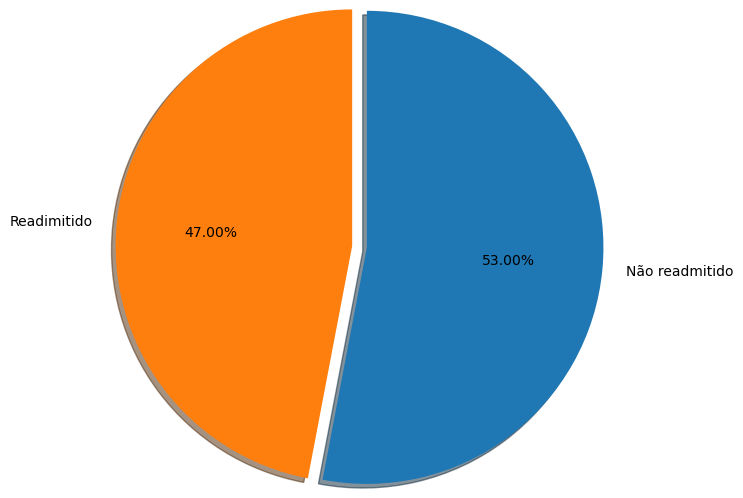

In [23]:
# Plotando o resultado

# Percentual
percent = round(dados['readmitted'].value_counts() / len(dados.index) * 100, 0)

# Labels
labels = ['Não readmitido', 'Readimitido']

# Plot em gráfico de área
plt.axis("equal")
plt.pie(percent , 
        labels = labels,
        radius = 1.6,
        autopct = '%1.2f%%',
        explode = [0.05,0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

> **CONCLUSÃO:** Cerca de 47% dos pacientes de diabetes foram readmitidos nos hospitais.

### Recategorização de Variável

> Notamos que a variável idade está na verdade como faixa etária, ou seja, uma variável categórica.

In [24]:
# Verifiandoo tipo
dados['age'].dtypes

dtype('O')

In [25]:
# Agrupando e verificando as faixas etárias
dados.groupby('age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

Text(0, 0.5, 'Quantidade')

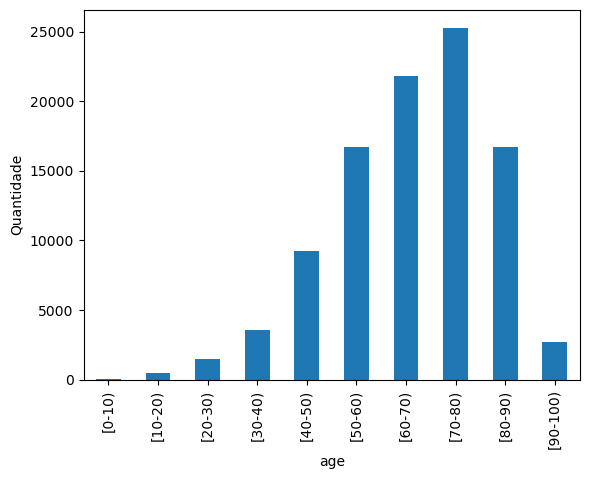

In [26]:
# Visualizando graficamente a distribuição
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Quantidade')

**Tomada de Decisão**

Ao analisar a distribuição, notamos que a maioria dos pacientes estão na faixa entre 50 e 90 anos.

Com base nessa informação, existem 2 estratégias a serem abordadas:
1. De uma maneira pouco exata, podemos utilizar a idade média (ponto médio) de cada faixa etária da categoria. Exemplo: de 10 a 20 anos, a idade média seria 15.

2. Continar utilizando categorias mas reduzindo o número de faixas etárias e **é essa a alternativa que adotaremos pois altera menos as informações contidas em tais dados**.

> **OBS:** isso não anula a primeira estratégia, é uma questão de escolha.

**Recategorizando a variável idade para distribuir os valores de maneira mais uniforme**

In [27]:
# Categorizando de 0-50 pessoas até 50 anos
# SEMÂNTICA: para(for) cada valor (val) dentro de dados['age'], eu retorno (0-50) se o valor estiver dentro do range abaixo, senão retorna o próprio valor
dados['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                          for val in dados['age']], index = dados.index)

In [28]:
# Categorizando de 80-100 pessoas acima de 80 anos
# SEMÂNTICA: para(for) cada valor (val) dentro de dados['age'], eu retorno (0-50) se o valor estiver dentro do range abaixo, senão retorna o próprio valor
dados['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                          for val in dados['age']], index = dados.index)

> **OBS:**
outras faixas etárias serão mantidas

In [29]:
dados['age'].dtypes

dtype('O')

Text(0, 0.5, 'Quantidade')

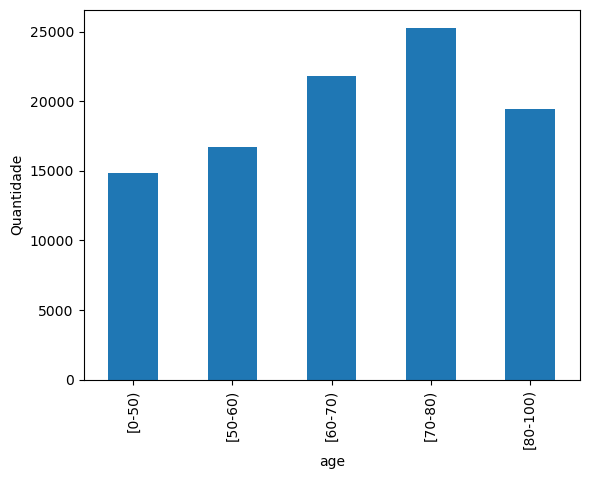

In [30]:
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Quantidade')

**Tratando e categorizando variáveis do tipo ID**

> A análise apontou que 'admission_type_id', 'harge_disposition_id' e 'admission_source_id' possuem valores com significado semelhante. Por isso decidimos misturá-los e com isso reduzir o volume dos dados.

In [31]:
# Mostrando os valores possíveis para a variável
dados['admission_type_id'].unique()

array([1, 2, 3, 6, 4, 5, 8, 7], dtype=int64)

In [32]:
# Total de valores para a variável
dados['admission_type_id'].nunique()

8

Variável **admission_type_id**

> Como a variável **admission_type_id** possui 9 valores distintos, como por exemplo, "emergência, urgência, eletiva, recém-nascido e não disponível". 
Reduziremos para somente 2 categorias: 'emergencia' e 'outro

In [33]:
dados['admission_type_id'] = pd.Series(['Emergencia' if val == 1 else 'Outro'
                                        for val in dados['admission_type_id']], index = dados.index)

In [34]:
dados['admission_type_id'].nunique()

2

In [35]:
dados['admission_type_id'].value_counts()

Emergencia    52178
Outro         45874
Name: admission_type_id, dtype: int64

Variável **discharge_disposition_id**

> Trata-se de um identificador inteiro correspondente a 29 valores distintos, por exemplo, "enviado para casa, expirou e não está disponível".
Para este caso também reduziremos para 2 categorias: Casa e Outro

In [36]:
dados['discharge_disposition_id'].nunique()

26

In [37]:
dados['discharge_disposition_id'].unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [38]:
dados['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outro'
                                              for val in dados['discharge_disposition_id']], index = dados.index)

In [39]:
dados['discharge_disposition_id'].value_counts()

Casa     57609
Outro    40443
Name: discharge_disposition_id, dtype: int64

Variável **admission_source_id**

> Outro caso de um identificador inteiro correspondente a 21 valores distintos, por exemplo, "encaminhamento médico, e transferência de um hospital"
Também reduziremos o volume de dados mas para 3 categorias: 'Sala_Emergencia', 'Recomendacao' e 'Outro'

In [40]:
dados['admission_source_id'].nunique()

17

In [41]:
dados['admission_source_id'].unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [42]:
dados['admission_source_id'] = pd.Series(['Sala_Emergencia' if val == 7 else 'Recomendacao' if val == 1 else 'Outro'
                                          for val in dados['admission_source_id']], index = dados.index)

**Tratando as variáveis 'diag_1', 'diag_2' e 'diag_3' (representam o diagnóstico médico)**

O conjunto de dados contém até três diagnósticos para um determinado paciente (primário, secundário e adicional), mas cada um deles tem códigos ICD-9 exclusivos e é extremamente difícil incluí-los no modelo para interpretá-los de forma significativa. 

Para contornar esse problema, reduziremos esses códigos de diagnóstico para 4 categorias.

**Códigos ICD-9 (International Classification of Diseases ou Código Internacional de Doenças):**

https://en.wikipedia.org/wiki/List_of_ICD-9_codes

http://www.icd9data.com/2013/Volume1/default.htm

https://icd.codes/icd9cm

https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/codes

In [43]:
# Concatenando as 3 variáveis em um só dataframe (cada código baseado no ICD-9)
diagnostico = dados[['diag_1', 'diag_2', 'diag_3']]
diagnostico

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
...,...,...,...
101761,250.13,291,458
101762,560,276,787
101763,38,590,296
101764,996,285,998


**Calculando a Comorbidade**

Em termos simples, comorbidade refere-se à presença de mais de um distúrbio na mesma pessoa. Por exemplo, se uma pessoa é diagnosticada com transtorno de ansiedade social (SAD) e transtorno depressivo maior (MDD), diz-se que ela possui transtornos depressivos e ansiosos comórbidos (significando de coexistentes). 

Outras condições que parecem se sobrepor incluem doenças físicas como diabetes, doenças cardiovasculares, câncer, doenças infecciosas e demência. Os transtornos mentais que tendem a mostrar comorbidade também incluem transtornos alimentares, transtornos de ansiedade e abuso de substâncias.

Não é incomum que as pessoas sofram de dois distúrbios ou doenças ao mesmo tempo. A comorbidade na doença mental pode incluir uma situação em que uma pessoa recebe um diagnóstico médico seguido pelo diagnóstico de um transtorno mental (ou vice-versa) ou pode envolver o diagnóstico de um transtorno mental seguido pelo diagnóstico de outro transtorno mental.

Um grande estudo epidemiológico nacional transversal de 2009 sobre comorbidade de transtornos mentais na atenção primária na Espanha, publicado no Journal of Affective Disorders, mostrou que entre uma amostra de 7936 pacientes adultos, cerca da metade tinha mais de um distúrbio psiquiátrico.

<a href="https://www.sciencedirect.com/science/article/abs/pii/S016503270900127X?via%3Dihub">Prevalence and comorbidity of common mental disorders in primary care</a>

Além disso, uma Pesquisa Nacional de Comorbidade dos EUA, 51% dos pacientes com diagnóstico de depressão também tiveram pelo menos um transtorno de ansiedade e apenas 26% deles não tiveram nenhum outro transtorno mental. No entanto, no Estágio Inicial de Desenvolvimento da Psicopatologia, 48,6% dos pacientes com diagnóstico de depressão também apresentaram pelo menos um transtorno de ansiedade e 34,8% deles não possuíam outro transtorno mental.

<a href="https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/psychiatric-comorbidity-an-artefact-of-current-diagnostic-systems/9DAFC6B16152FFE0F297E4A9DB0A1674/core-reader">‘Psychiatric comorbidity’: an artefact of current diagnostic systems?</a>

Defining Comorbidity: Implications for Understanding Health and Health Services:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2713155/


Comorbidity: Substance Use Disorders and Other Mental Illnesses:

https://www.drugabuse.gov/publications/drugfacts/comorbidity-substance-use-disorders-other-mental-illnesses

>INSIGHT:
Queremos descobrir se o paciente que tinha comorbidades, foi readmitido ou não. Para isso reorganizaremos os dados.

In [44]:
# Utilizaremos expressões regulares (r é um padrão ao qual o mecanismo de expressões regulares tenta corresponder no texto de entrada)
import re

In [45]:
# Função para calcular comorbidade
def calcula_comorbidade(row):
    
    #  ========== CÓDIGO 250 (diabetes)  ==========
    codigos_doenca_diabetes = "^[2][5][0]"


    # ========== CÓDIGO DE PROBLEMAS CIRCULATÓRIOS ==========
    # CÓDIGO 39x (x = valor entre 0 e 9)
    # CÓDIGO 4zx (z = valor entre 0 e 6 | z = valor entre 0 e 9)
    codigos_doenca_circulatorios = "^[3][9][0-9]|^[4][0-5][0-9]"

    # INICIALIZANDO A VARIÁVEL
    valor = 0

    # VALOR 0
    # Indica que Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente 
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 0

    # VALOR 1
    # Indica que pelo menos um diagnóstico de diabetes e problemas circulatórios foram detectados de forma simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))): 
        valor = 1

    # VALOR 2
    # Indica que Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 2

    # VALOR 3
    # Indica que pelo menos um diagnóstico de diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 3 
    
    return valor

**Aplicando a função nas variáveis**

In [46]:
%%time
dados['comorbidade'] = diagnostico.apply(calcula_comorbidade, axis = 1)

Wall time: 17.1 s


In [47]:
dados.shape

(98052, 48)

In [48]:
dados.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,Up,No,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,Up,No,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,Steady,No,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,Steady,No,No,No,No,No,No,Yes,1,3


In [49]:
# Valores únicos
dados['comorbidade'].unique()

array([1, 3, 2, 0], dtype=int64)

In [50]:
# Valores únicos contagem
dados['comorbidade'].value_counts()

2    39551
0    22645
1    18192
3    17664
Name: comorbidade, dtype: int64

>Não precisamos mais das variáveis 'diag_1','diag_2','diag_3', então vamos dropá-las

In [51]:
# Drop das variáveis individuais, pois fizemos engenharia e colocamos em uma só variável (comorbidade)
dados.drop(['diag_1','diag_2','diag_3'], axis = 1, inplace = True)

In [52]:
# Calcula o percentual de comorbidade por tipo e por classe da variável alvo (0 = não readimitido, 1 = readmitido)
percent_com = pd.crosstab(dados.comorbidade , dados.readmitted , normalize = 'index') * 100
percent_com

readmitted,0,1
comorbidade,,
0,55.526606,44.473394
1,53.875330,46.124670
2,51.748376,48.251624
3,53.753397,46.246603


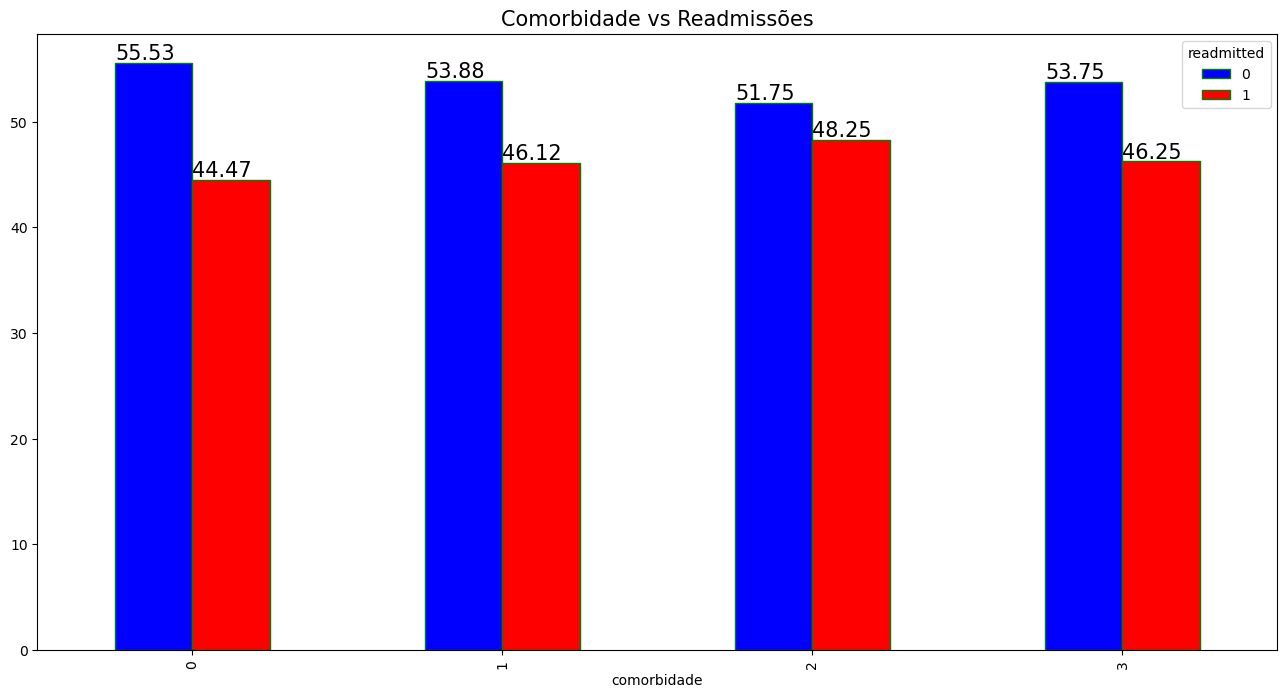

In [53]:
# Plotando os resultados

# Preparando a figura a partir dos dados
fig = percent_com.plot(kind = 'bar', 
                       figsize = (16, 8), 
                       width = 0.5, 
                       edgecolor = 'g', 
                       color = ['b','r'])

# Desenhaando cada grupo
for i in fig .patches:
    fig.text(i.get_x() + 0.00, 
             i.get_height() + 0.3, 
             str(round((i.get_height()), 2)), 
             fontsize = 15, 
             color = 'black',
             rotation = 0)

# Título e Print
plt.title("Comorbidade vs Readmissões", fontsize = 15)
plt.show()

>Ano analisarmos esse gráfico, notamos que o VALOR 3 possui menor ocorrência de readmissões, o que pode ser que não haja relação entre comorbidade e readmissão

>Além disso, notamos que quando é VALOR 0, o percentual é menor para vermelha (readmissão), quando a comorbidade é VALOR 2, o percentual vermelho é maior. Vale a pena uma verificação.

**Variáveis de Dosagem de Medicamentos e Agrupamento de Variáveis**

> Verificamos que no conjunto de dados, existem 23 recursos para 23 medicamentos que indicam, em casa um, se uma alteração no medicamento foi feita ou não durante a atual internação do paciente. 

**Para melhor visualizarmos, faremos um plot de algumas variáveis que indicam uso de medicamento.**

Text(0, 0.5, 'Count')

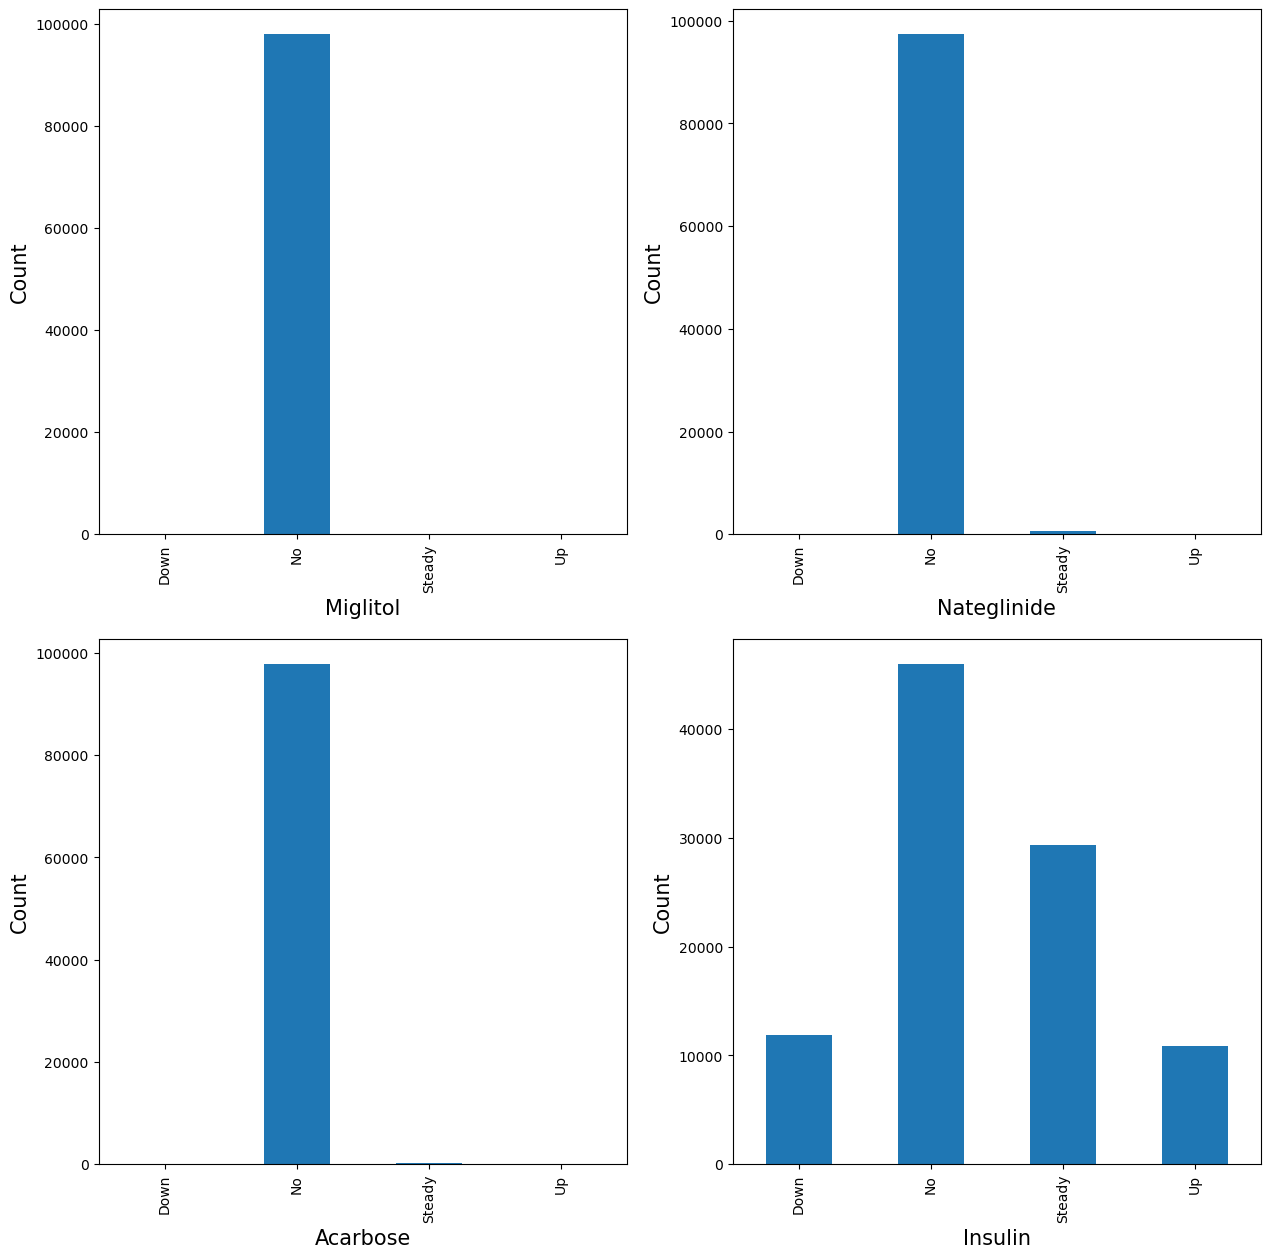

In [54]:
fig = plt.figure(figsize = (15, 15))

ax1 = fig.add_subplot(221)
ax1 = dados.groupby('miglitol').size().plot(kind= 'bar')
plt.xlabel('Miglitol', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax1 = fig.add_subplot(222)
ax1 = dados.groupby('nateglinide').size().plot(kind= 'bar')
plt.xlabel('Nateglinide', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax1 = fig.add_subplot(223)
ax1 = dados.groupby('acarbose').size().plot(kind= 'bar')
plt.xlabel('Acarbose', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax1 = fig.add_subplot(224)
ax1 = dados.groupby('insulin').size().plot(kind= 'bar')
plt.xlabel('Insulin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

>Desejamos descobrir a relação entre mudança das dosagens de medicamentos e as readmissões, independentemente de qual medicamento foi alterado. Em resumo, transformaremos 23 variáveis em 2 colunas.

In [55]:
dados.shape

(98052, 45)

In [56]:
# Verificando as colunas
dados.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'comorbidade'],
      dtype='object')

In [57]:
# Lista com os nomes dos medicamentos(3 variáveis já tinham sido removidas)
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [58]:
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp' # adicionamos 'temp' para nomear a variável e ainda sim sabermos de qual se trata
        dados[colname] = dados[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1) # se x = 'No' ou 'Steady' retorne 0, senão, retorne 1

In [59]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   encounter_id                  98052 non-null  int64 
 1   patient_nbr                   98052 non-null  int64 
 2   race                          98052 non-null  object
 3   gender                        98052 non-null  object
 4   age                           98052 non-null  object
 5   admission_type_id             98052 non-null  object
 6   discharge_disposition_id      98052 non-null  object
 7   admission_source_id           98052 non-null  object
 8   time_in_hospital              98052 non-null  int64 
 9   num_lab_procedures            98052 non-null  int64 
 10  num_procedures                98052 non-null  int64 
 11  num_medications               98052 non-null  int64 
 12  number_outpatient             98052 non-null  int64 
 13  number_emergenc

In [60]:
# Criando uma variácel para receber a contagem por paciente
dados['num_alt_dosagem_med'] = 0

>DICA: iniciar a coluna com valor 0, é ideal para se evitar valores nulos.

In [61]:
# Contando as mudanças da dosagem dos medicamentos
for col in medicamentos:
    if col in dados.columns: # verificamos se a coluna existe no datafram
        colname = str(col) + 'temp' # receberá o valor 'temp' 
        dados['num_alt_dosagem_med'] = dados['num_alt_dosagem_med'] + dados[colname] # inserimos os registros na variável criada
        del dados[colname] # deletando colname que era uma variável temporária

In [62]:
dados['num_alt_dosagem_med'].value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: num_alt_dosagem_med, dtype: int64

> Ou seja:
- 71k pacientes tiveram 0 mudanças na dosagem
- 25k tiveram 1 mudança
- 1k tiveram 2 mudanças
- 107 tiveram 3 mudanças
- 5 tiveram 4 mudanças

In [63]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,No,No,No,No,No,Ch,Yes,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,Yes,0,1,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,No,No,No,No,No,Ch,Yes,0,3,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,No,No,No,No,No,Ch,Yes,0,1,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,No,No,No,No,No,Yes,1,3,0


**Mudaremos o valor das colunas dos medicamentos para verificar se esse medicamento está sendo administrado ou não para um paciente**

In [64]:
# Nota-se que se não tinha medicamentos, atribuímos 0, se tiver qualquer medicação, atribuímos 1
for col in medicamentos:
    if col in dados.columns:
        dados[col] = dados[col].replace('No', 0)
        dados[col] = dados[col].replace('Steady', 1)
        dados[col] = dados[col].replace('Up', 1)
        dados[col] = dados[col].replace('Down', 1)

**Agora, criamos uma coluna para refletir quantos medicamentos estão sendo administrados a um paciente.**

In [65]:
dados['num_med'] = 0

In [66]:
# Carregando a variável
for col in medicamentos:
    if col in dados.columns:
        dados['num_med'] = dados['num_med'] + dados[col]

In [67]:
# Contando o número de medicamentos
dados['num_med'].value_counts()

1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: num_med, dtype: int64

In [68]:
# Removendo as colunas de medicamentos
dados = dados.drop(columns = medicamentos)

In [69]:
dados.shape

(98052, 27)

**Recoding de variáveis categóricas**

Vamos fazer o recoding de algumas variáveis categóricas.

In [70]:
dados['change'].value_counts()

No    52774
Ch    45278
Name: change, dtype: int64

>A variável 'change' além de estar com categórica ('No' e 'Ch') está pouco intuitiva, não indicando direito o seu significado. Já as variáveis 'gender' e 'diabetesMed', faremos uma categorização normal. E deixando em um padrão de 0 e 1 para nossa análise.

In [71]:
dados['gender'].value_counts()

Female    52833
Male      45219
Name: gender, dtype: int64

In [72]:
dados['diabetesMed'].value_counts()

Yes    75350
No     22702
Name: diabetesMed, dtype: int64

In [73]:
# Recoding
dados['change'] = dados['change'].replace('Ch', 1)
dados['change'] = dados['change'].replace('No', 0)
dados['gender'] = dados['gender'].replace('Male', 1)
dados['gender'] = dados['gender'].replace('Female', 0)
dados['diabetesMed'] = dados['diabetesMed'].replace('Yes', 1)
dados['diabetesMed'] = dados['diabetesMed'].replace('No', 0)

>Também objetivamos reduzir o resultado do teste A1C e o resultado do teste sérico de glicose em categorias de 'Normal', 'Anormal' e 'Não Testado', com valores 1, 0 e -99, respectivamente.

In [74]:
dados['A1Cresult'].value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [75]:
dados['max_glu_serum'].value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [77]:
# Recoding
dados['A1Cresult'] = dados['A1Cresult'].replace('>7', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('>8', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('Norm', 0)
dados['A1Cresult'] = dados['A1Cresult'].replace('None', -99)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>200', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>300', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('Norm', 0)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('None', -99)

**Variável patient_nbr**

Alguns pacientes no conjunto de dados tiveram mais de uma consulta(encontro). 

Não podemos contá-los como consultas independentes, porque influenciaria os resultados para aqueles pacientes que tiveram várias consultas. Para isso, algumas hipóteses são indicadas para recolher e consolidar várias consultas para o mesmo paciente:

- Permanência média no hospital em várias consultas
- Porcentagem de alterações na medicação em várias consultas
- Usar o número total de consultas para substituir o ID exclusivo da consulta
- Usar a combinação de diagnósticos em várias consultas como uma lista

Por fim, o ideal foi deixar apenas um registro de consulta para cada paciente e optamos por manter a primeira.

>Antes, removeremos a duplicidade por id de paciente, mantendo somente o primeiro registro.

In [80]:
dados = dados.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In [81]:
dados.shape

(68629, 28)

**Salvando e gerando um arquivo .CSV**

In [ ]:
# dados.to_csv('dados/dados_parte1.csv', index = False)

# Fim - Parte 1